In [ ]:
#  In this notebook we use pylabeler package but there are few other choices to convert yolotxt format to coco such as following github repository
# ! cd Yolo-to-COCO-format-converter

In [ ]:
# We need to mount data from a drive using the code below.

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Installing the packege we wanna use to this transform in label formats

! pip install pylabel

In [ ]:
from pylabel import importer

In [ ]:
# Origin format' labels file
path_to_annotations = '/content/drive/MyDrive/Waste trash model/modified_yolo_drinking_water_classification'

# Origin format' images file
path_to_images = "/content/drive/MyDrive/Waste trash model/modified_yolo_drinking_water_classification"
# It's ok that labels and image files are in same path.

# Defining yolo classes:
yoloclasses = ['AluCans', 'Glass', 'HDPEM', 'PET']

# Creating a dataset obejc from our images and corresponding labels.
dataset = importer.ImportYoloV5(path=path_to_annotations, path_to_images=path_to_images, cat_names=yoloclasses,
    img_ext="jpg", name="Drinking bottles")

In [ ]:
# Pylabler has options to analyse the data:

dataset.splitter.StratifiedGroupShuffleSplit(train_pct=.7, val_pct=.15, test_pct=.15, batch_size=1)
dataset.analyze.ShowClassSplits()

,all,train,test,val
cat_name,,,,
PET,0.296662,0.296736,0.25,0.25
Glass,0.277503,0.277547,0.25,0.25
AluCans,0.222793,0.222750,0.25,0.25
HDPEM,0.203042,0.202967,0.25,0.25


In [ ]:
# dataset object is a data frame object and this feature helps developers to use and analyse data in the way they want.

dataset.df.head(5)

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,/content/drive/MyDrive/Waste trash model/modif...,PET527.jpg,,2,512,683,3,,177.0,293.0,...,,,,,,3,PET,,,1
1,/content/drive/MyDrive/Waste trash model/modif...,PET509.jpg,,8,512,683,3,,207.0,317.0,...,,,,,,3,PET,,,1
2,/content/drive/MyDrive/Waste trash model/modif...,PET511.jpg,,10,512,683,3,,-1.0,151.0,...,,,,,,3,PET,,,1
3,/content/drive/MyDrive/Waste trash model/modif...,PET534.jpg,,13,512,683,3,,63.0,214.0,...,,,,,,3,PET,,,1
4,/content/drive/MyDrive/Waste trash model/modif...,PET536.jpg,,14,512,683,3,,198.0,182.0,...,,,,,,3,PET,,,1


In [ ]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")

Number of images: 4815
Number of classes: 4
Classes:['AluCans', 'Glass', 'HDPEM', 'PET']
Class counts:
PET        1502
Glass      1405
AluCans    1128
HDPEM      1028
Name: cat_name, dtype: int64


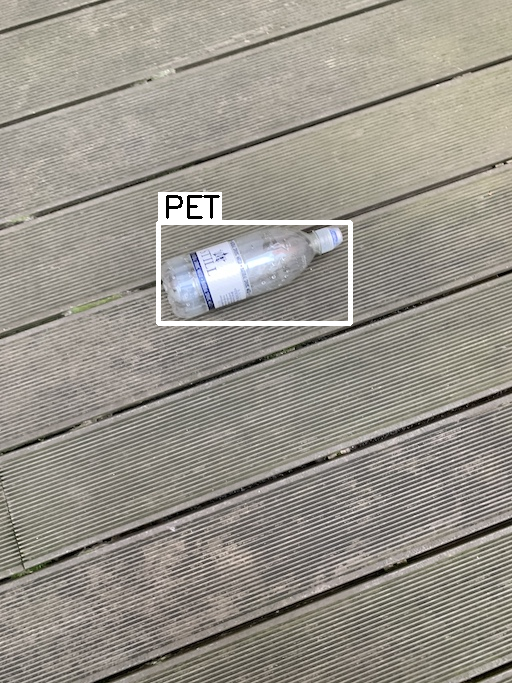

In [ ]:
# Showing a example of data and bounding box from its label

from IPython.display import Image, display
display(dataset.visualize.ShowBoundingBoxes(101))

In [ ]:
# Exporting our data to coco format
dataset.export.ExportToCoco(cat_id_index=1,use_splits=True)

In [ ]:
# This repository helps us spliting our coco format data to train and test splits which it is a bit difficult with ordinary methods.

!git clone 'https://github.com/akarazniewicz/cocosplit'

In [ ]:
# Installing requirement for this application:

!pip install -r '/content/cocosplit/requirements.txt'

There is a point here; JSON format export file from pylabeler package dosen't contain items **'licenses'** and **'Info'** which are necessary for standard coco labeling format. So we have to remove any code about these two items in ***cocosplit.py*** file.

Don't worry about missing data because these two items is not necessary for training data.

In [ ]:
# !python 'cocosply.py path' --having-annotations --multi-class -s 0.8 'Your whole labels path' 'train.json' 'test.json'

# For example:
# U can easily change the train/test ratio which has been set to 0.8 for train and 0.2 for test subsequently

!python '/content/cocosplit/cocosplit.py' --having-annotations --multi-class -s 0.8 '/content/drive/MyDrive/Waste trash model/Detection/Copy of Drinking bottles.json' 'train.json' 'test.json'